In [172]:
import math

K = 4
R = math.floor(math.log2(G)) 
N = K + R

# Вероятность ошибки
# Парметр точности (число экспирементов)
EPS = 0.05
# Вероятность ошибки в канале
DELTA_ERR = 0.01
# Длина кодируемой последовательности
L = 6
# Порождающий многочлен
G = 0b10111

FIXED_M = 0b111

# Путь к исполняемо файлу с кодером/декодером
EXE_PATH = './build/cyclic_mode.exe'

EXPIREMENTS = round(9 / (4 * EPS**2))

# Путь для сохранения данных
INPUT_FILE = './input_c.txt'
OUTPUT_FILE = './output_c.txt'

INPUT_FILE_RES = './input_res.txt'
OUTPUT_FILE_RES = './output_res.txt'

In [173]:
import random
# Генерация случайных сообщений в заданном диапозоне

# Начальное значение диапазона
START_INDEX = 0
# Конечное значение диапазона
END_INDEX = 2**L - 1 

messages = []

with open(INPUT_FILE, 'w') as file:
    for _ in range(EXPIREMENTS):
        random_number = random.randint(START_INDEX, END_INDEX)
        file.write(str(random_number) + '\n')
        messages.append(random_number)

print(f"File '{EXE_PATH}' with {EXPIREMENTS} random numbers in range from {START_INDEX} to {END_INDEX} has been generated.")

File './build/cyclic_mode.exe' with 900 random numbers in range from 0 to 63 has been generated.


In [174]:
# Доп задание
messages = []

with open(INPUT_FILE, 'w') as file:
    for _ in range(EXPIREMENTS):
        file.write(str(FIXED_M) + '\n')
        messages.append(FIXED_M)

print(f"File '{EXE_PATH}' with {EXPIREMENTS} fixed number: {bin(FIXED_M)} has been generated.")

File './build/cyclic_mode.exe' with 900 fixed number: 0b111 has been generated.


In [175]:
import subprocess

try:
    subprocess.run([EXE_PATH, "-c", "-i", INPUT_FILE, "-g", str(G), "-o", OUTPUT_FILE], check=True)
except FileNotFoundError:
    print("Executable not found.")

In [176]:
import numpy as np # type: ignore

a_s = []
b_s = []

with open(OUTPUT_FILE, "r") as file:
    # Читаем строки из файла
    for line in file:
        number = int(line.strip())
        a_s.append(number)

print(a_s)


index = 0
for p in np.arange(0, 1.000001, DELTA_ERR):
    errs = 0
    m = np.random.randint(0, 2**(L+1)-1)
    
    # print (f'M: {bin(m)}')
    for i in range(EXPIREMENTS):
        # Создание случайного сообщения длиной L
        m = a_s[index]
        # Генерация вектора ошибки
        e, e_deg = 0, 0
        while (L + 3) > e_deg:
            rand = np.random.random()
            if rand <= p:
                e += 2**e_deg
            e_deg += 1
        m ^= e
        b_s.append(m)
    index += 1


with open(INPUT_FILE_RES, "w") as file:
    # Записываем каждое число из списка на отдельной строке
    for number in b_s:
        file.write(str(number) + "\n")


[114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114,

In [177]:
import subprocess

try:
    subprocess.run([EXE_PATH, "-d", "-i", INPUT_FILE_RES, "-g", str(G), "-o", OUTPUT_FILE_RES], check=True)
except FileNotFoundError:
    print("Executable not found.")

In [178]:
res_s = []

with open(OUTPUT_FILE_RES, "r") as file:
    # Читаем строки из файла
    for line in file:
        number1, number2 = line.split(', ')[0], line.split(', ')[1]
        res_s.append({"s": int(number1), "E": int(number2)})

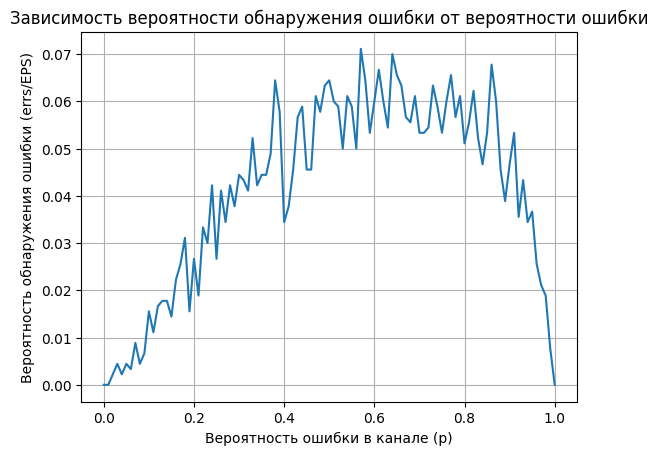

In [179]:
import matplotlib.pyplot as plt
import numpy as np


Errs = []

for i in range(index):
    # Читаем строки из файла
    errors_count = 0
    counter = 0
    for j in range(EXPIREMENTS):
        s = res_s[i*EXPIREMENTS + j]["s"]
        E = res_s[i*EXPIREMENTS + j]["E"]
        m = messages[i]
        if ((m != s) and (E == 0)):
            errors_count += 1
    Errs.append(errors_count / EXPIREMENTS)


plt.plot(np.arange(0, 1.000001, DELTA_ERR), Errs)
plt.xlabel('Вероятность ошибки в канале (p)')
plt.ylabel('Вероятность обнаружения ошибки (errs/EPS)')
plt.title('Зависимость вероятности обнаружения ошибки от вероятности ошибки')
plt.grid(True)
plt.show()